# Introduction

#####   This report presents an analysis of the electric vehicle (EV) market (in USA), focusing on key trends in adoption, geographical distribution, types of EVs, popular makes and models, electric range, and market growth projections. By examining these aspects, we aim to provide valuable insights into the current state and future prospects of the EV industry.

## Importing The Necessary Libraries:

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore')

df_original = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Data Analysis Projects\EVs Market Analysis\EVs_Market.csv')

df = df_original.copy()

df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


## Data Cleaning:

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

##### - Handling missing values

In [89]:
# check if there are missing values in the dataset
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [90]:
# dropping missing values from the dataset
df = df.dropna()

In [91]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

- As we see now we have no missing values in our data anymore.

---

## Exploratory Data Analysis (EDA):
- #### **Points To Explore:**
     - EV Adoption Over Time.
     - Geographical Distribution of EVs.
     - Types of EVs.
     - Popular Makes and Models.
     - Electric Range.
     - Market Growth Projections.
     
     

-  **1 -** EV Adoption Over Time:
          
    -  How has the population of EVs grown year over year?

In [92]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [93]:
df_evs_adoption_year = df['Model Year'].value_counts().sort_index().to_frame()

df_evs_adoption_year.sample(5)

,count
Model Year,
2000,7
2020,11740
2013,4399
2003,1
2014,3496


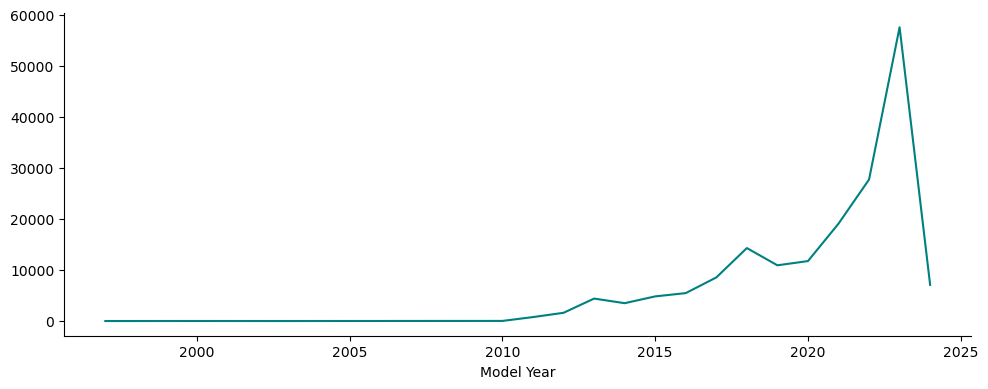

In [94]:
df_evs_adoption_year.plot(kind='line', figsize=(10, 4), color='teal', legend=False)

sns.despine()

plt.tight_layout()
plt.show()

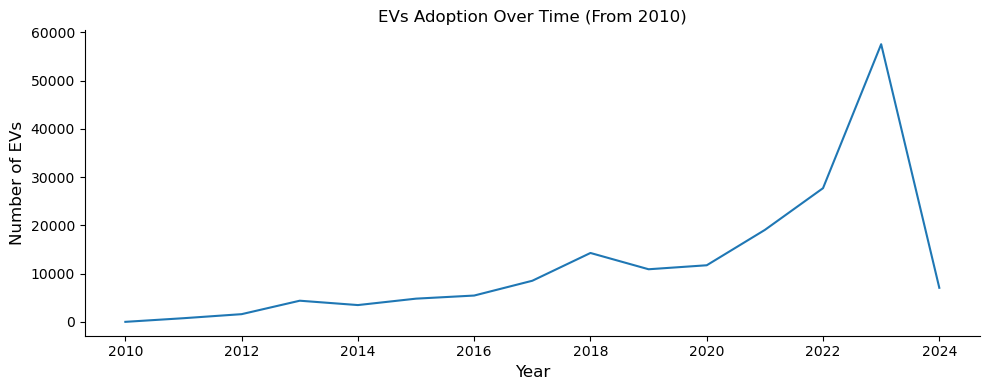

In [95]:
# fromatting the plot with seaborn
plt.figure(figsize=(10, 4))
# plotting from 2010
df_plot = df_evs_adoption_year[df_evs_adoption_year.index >= 2010]
sns.lineplot(x=df_plot.index, y=df_plot['count'], data=df_plot, palette='crest')


# Create a function to format y-axis values 
def format_yaxis(value, tick_number):
    return f'{int(value/1000)}K'


# Format the y-axis 
#plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))

plt.title('EVs Adoption Over Time (From 2010)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of EVs', fontsize=12)
plt.xticks(rotation=0)

sns.despine()
plt.tight_layout()
plt.show()


- **Insights:**

   -   Steady Growth: Consistent increase in EV adoption since 2011.

   -   Spike in 2023: Significant rise in EV registrations, surpassing 50,000, possibly due to incentives, new models, or infrastructure improvements.
   
   -   Early Adoption Phase: Gradual growth from 2011 to 2015, marking the initial stages of EV market penetration.

-  **Note:** 
   -  *In 2024, 7072 EVs ara registered which suggests that the dataset for 2024 is incomplete.* 

----

-   **2 -** Geographical Distribution of EVs:
    -    Which counties have the highest number of EV registrations? 
    -    How is the distribution of EVs within the cities of these top counties?

In [96]:
df_county = df.copy()

In [97]:
# filtering the dataset to get the top 5 counties
top_5_counties = df_county['County'].value_counts().head(5).reset_index()

top_5_counties

,County,count
0,King,92740
1,Snohomish,21001
2,Pierce,13782
3,Clark,10409
4,Thurston,6428


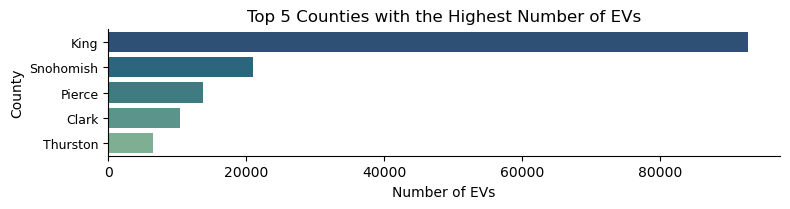

In [98]:
plt.figure(figsize=(8, 2.2))
# filtering the dataset to get the top 5 counties
# top_5_counties = df_county['County'].value_counts().head(5).plot(kind='barh', color='slategrey')
# plt.gca().invert_yaxis()

sns.barplot(data=top_5_counties, x='count', y='County', palette='crest_r')

sns.despine()
plt.title('Top 5 Counties with the Highest Number of EVs', fontsize=12)
plt.yticks(fontsize=9)
plt.xlabel('Number of EVs')
plt.ylabel('County')

plt.tight_layout()
plt.show()


-   #### **Key Insights:**
    -   **King County** leads in EV adoption, showing strong infrastructure and incentives.

    -   Numbers gradually decrease from *King* to *Thurston* County, indicating urban areas have higher EV adoption.

    -   **Snohomish & Pierce** Counties also show significant numbers, likely benefiting from proximity to *King* County.

    -   **Clark & Thurston** Counties have the lowest among the top five, possibly due to rural settings.


- Now let's analyze the distribution of EVs with in the cities in the top 5 counties:

In [99]:
top_5_counties_list = df_county['County'].value_counts().head(5)

In [100]:
# creating a new dataframe for only the top 5 counties
df_city = df_county[df_county['County'].isin(top_5_counties_list.index)]

#df_city.head(2)

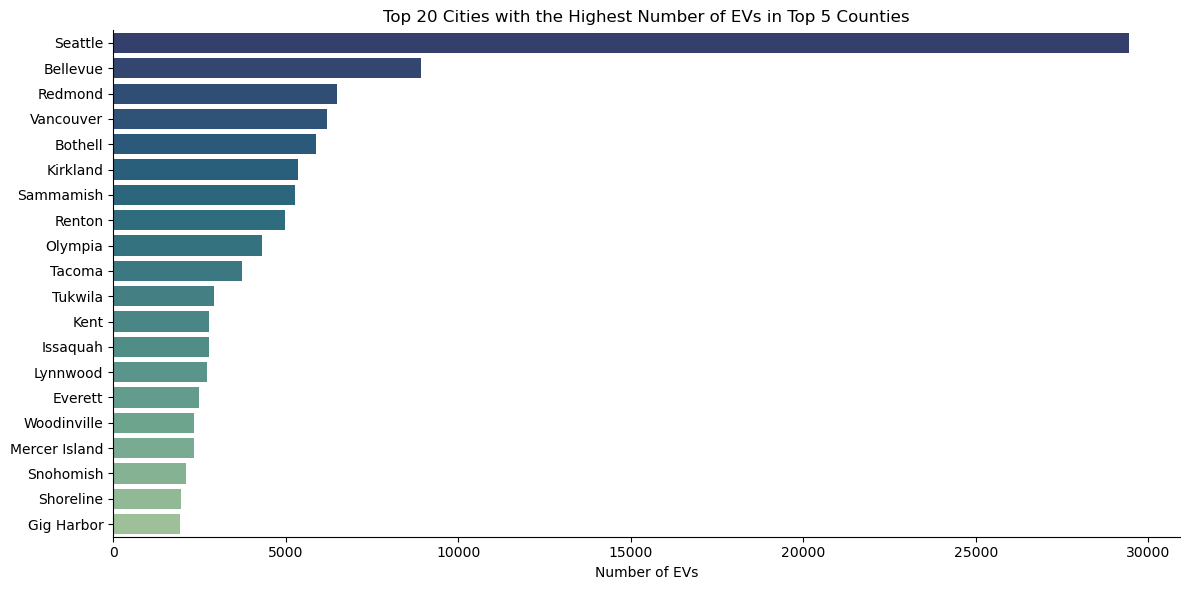

In [101]:
plt.figure(figsize=(12, 6))
# plotting the top 20 cities with the highest number of EVs
df_plot = df_city['City'].value_counts().head(20)

sns.barplot(x=df_plot.values, y=df_plot.index, palette='crest_r')

sns.despine()

plt.title('Top 20 Cities with the Highest Number of EVs in Top 5 Counties')
plt.xlabel('Number of EVs')
plt.ylabel('')

plt.tight_layout()
plt.show()

-  **Key Insights:**
    -   **Seattle** leads by a significant margin, indicating it has the highest number of EVs.

    -   **Bellevue and Redmond** follow, showing strong EV adoption likely due to tech influence and infrastructure.

    -   **Vancouver and Bothell** also have a substantial number of EVs, *suggesting these cities have embraced EVs.*

    -   **Shoreline and Gig Harbor** have the fewest EVs among the *top 20*, indicating lower adoption rates in these areas.


----

-   **3 -** Types of EVs:
    

In [102]:
df_evs_types = df.groupby('Electric Vehicle Type').size().reset_index(name='Count')

df_evs_types

,Electric Vehicle Type,Count
0,Battery Electric Vehicle (BEV),138947
1,Plug-in Hybrid Electric Vehicle (PHEV),38526


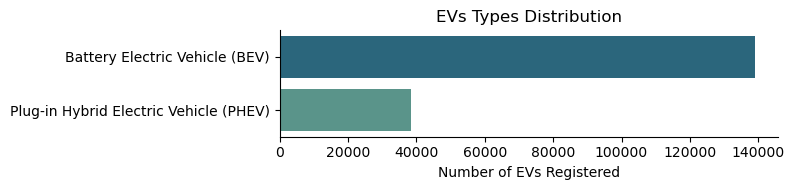

In [103]:
# plot the distribution of EVs types
plt.figure(figsize=(8, 2))

sns.barplot(y='Electric Vehicle Type', x='Count', data=df_evs_types, palette='crest_r')


plt.title('EVs Types Distribution')
plt.ylabel('')
plt.xlabel('Number of EVs Registered')
sns.despine()
plt.tight_layout()
plt.show()

-   #### Insights:
    -   **Battery Electric Vehicles (BEVs)** lead with around 140,000

    -   **Plug-in Hybrid Electric Vehicles (PHEVs)** have about 50,000 registrations, indicating a significant but smaller share.

    

-   The chart suggests a stronger preference for fully electric vehicles over hybrids.

____

- **4 -** Makes And Models:

In [104]:
# Counting the top 10 most popular manufacturers in the dataset
df_makes = df.groupby('Make').size().reset_index(name='Count').sort_values(ascending=False, by='Count').head(10)
#df_makes

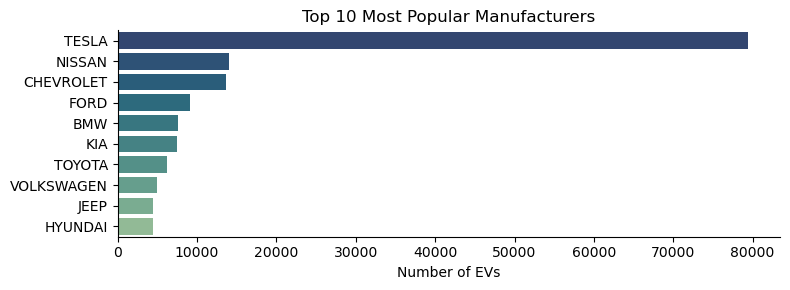

In [105]:
plt.figure(figsize=(8, 3))

# Plotting the top 10 most popular manufacturers
sns.barplot(data=df_makes, x='Count', y='Make', palette='crest_r')

sns.despine()
plt.title('Top 10 Most Popular Manufacturers')
plt.xlabel('Number of EVs')
plt.ylabel('')
plt.tight_layout()
plt.show()

-   #### Insights:
    -   **Tesla** leads the market with the highest number of EVs, indicating strong brand loyalty and innovation.

    -   **Nissan and Chevrolet** follow, benefiting from competitive pricing and diverse EV models.

    -   **Ford and BMW**show solid market shares, combining traditional brand loyalty with new EV offerings.

    -   *Kia*, *Toyota*, *Volkswagen*, *Jeep*, and *Hyundai* also feature in the top 10, showing a competitive and evolving market landscape.

  

-   Now let's find the most popular *Models* by the top *Manufaturers*

In [106]:
# Creating DataFrame for only top 10 manufaturers 
df_top10_makes = df[df['Make'].isin(df_makes['Make'])]

#df_top10_makes.head()

In [107]:
df_plot = df_top10_makes.groupby(['Make', 'Model']).size().reset_index(name='Count').sort_values(ascending=False, by='Count').head(10)

df_plot

,Make,Model,Count
52,TESLA,MODEL Y,35921
49,TESLA,MODEL 3,30009
48,NISSAN,LEAF,13352
50,TESLA,MODEL S,7711
16,CHEVROLET,BOLT EV,6811
51,TESLA,MODEL X,5784
20,CHEVROLET,VOLT,4782
61,VOLKSWAGEN,ID.4,3928
38,JEEP,WRANGLER,3382
26,FORD,MUSTANG MACH-E,3316


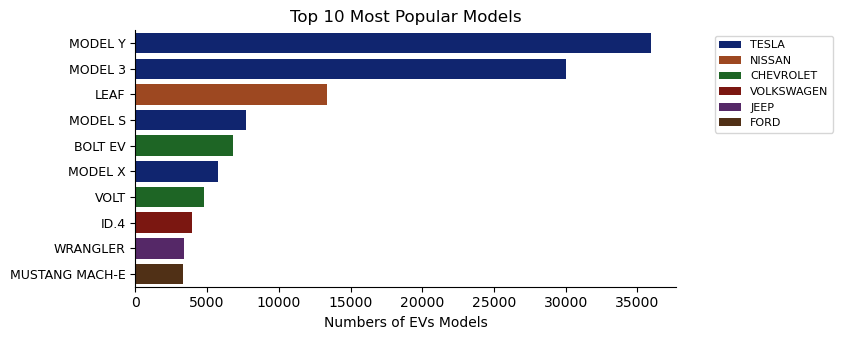

In [108]:
# Plot the top 10 most popular models
plt.figure(figsize=(9, 3.5))

sns.barplot(data=df_plot, x='Count', y='Model', hue='Make', palette='dark')

sns.despine()
plt.title('Top 10 Most Popular Models')
plt.xlabel('Numbers of EVs Models')
plt.ylabel('')
plt.yticks(fontsize=9)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1) ,fontsize=8)

plt.tight_layout()
plt.show()

-   #### Insights:
    -   **Tesla** models are the most popular, with four models in the top 10. Model Y and Model 3 lead the list, showing Tesla's strong market presence and

    -   **Nissan's LEAF** and **Chevrolet's Bolt** EV and Volt are also prominent, indicating these brands have substantial market share in the EV segment.

    -   The presence of *Volkswagen (ID.4)*, *Jeep (Wrangler)*, and *Ford (Mustang Mach-E)* shows a diverse mix of manufacturers contributing to the EV market.

-   The high number of registrations for *Tesla models* suggests a strong preference for their vehicles, likely due to their performance, range, and brand reputation.

_____

- **5 -** EV Range:
   - How has the distribution of electric vehicle ranges changed over time?
   - What are the key differences in range between different models by manufacturers?
     

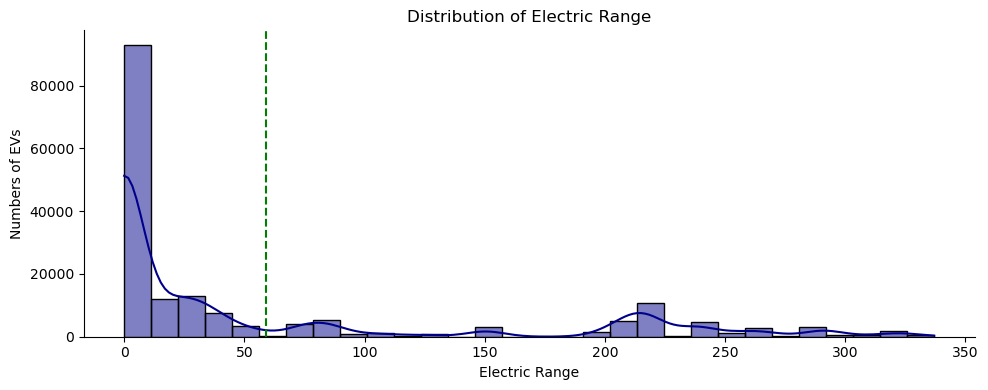

In [109]:
plt.figure(figsize=(10, 4))

# Plottin The Distribution of Electric Range
sns.histplot(df['Electric Range'], bins=30, kde=True, color='darkblue')

plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Numbers of EVs')

plt.axvline(df['Electric Range'].mean(), color='green', linestyle='--', label='Mean')

sns.despine()
plt.tight_layout()
plt.show()


- **Key Insights:**
    -   Concentration Around Lower Ranges:

        -   The majority of EVs have an electric range between 0 to 50 miles.

        -   Within this range, there's a particularly high concentration around 0 to 25 miles, indicating that many EVs are designed for shorter distances.

    -   Significant Drop Beyond 50 Miles:

        -   There is a noticeable decline in the number of EVs as the range exceeds 50 miles. This could suggest fewer options or higher costs for longer-range EVs.

    -   Threshold at 50 Miles:

        -   The green dashed vertical line at around 50 miles may denote a significant threshold, possibly related to regulatory standards, market preferences, or technological limitations.

    -   Smaller Peaks at Higher Ranges:

        -   There are minor peaks at roughly 100, 150, 200, and 250 miles, indicating that some EVs are capable of these ranges but are much less common compared to the 0-50 mile range.

____

-  Now let's analyze the progression of electric vehicle (EV) ranges over the years from 1997 to 2024:

In [110]:
top_5_make = df['Make'].value_counts().head(5).index

In [111]:
df_top5_makes = df[df['Make'].isin(top_5_make)]

#df_top5_makes

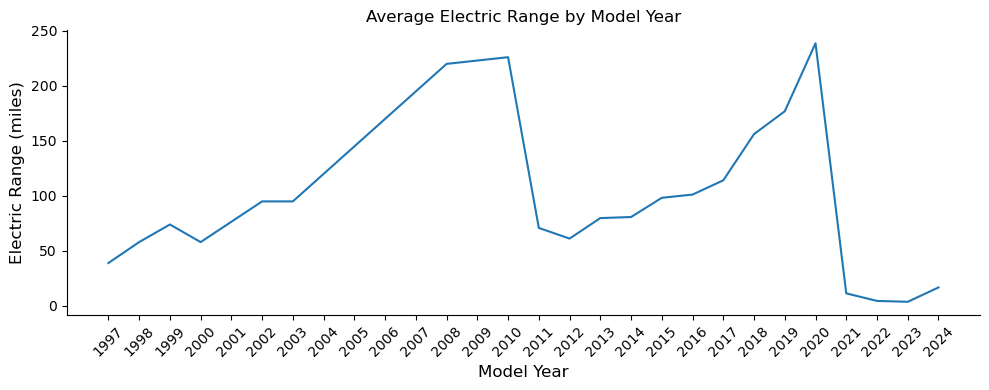

In [112]:
# Group data by Model Year and calculate the average Electric Range
range_by_year = df.groupby('Model Year', as_index=False)['Electric Range'].mean()

plt.figure(figsize=(10, 4))
# Plot using the averafe range by model year
sns.lineplot(data=range_by_year, x='Model Year', y='Electric Range', marker='')


plt.title('Average Electric Range by Model Year', fontsize=12)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Electric Range (miles)', fontsize=12)

plt.xticks(range(range_by_year['Model Year'].min(), range_by_year['Model Year'].max()+1), rotation=45)

sns.despine()
plt.tight_layout()
plt.show()


-   **Key Insights:**

    -   Initial Gradual Increase (1997-2009):

        -   The average electric range steadily increases from around 1997 to 2009, peaking at approximately 200 miles. This trend likely reflects advancements in battery technology and increasing investment in electric vehicles.

    -   Significant Drop Around 2010:

        -   There is a noticeable sharp decline in the average electric range around 2010. This could be due to various factors, such as economic conditions, shifts in manufacturing focus, or changes in regulatory environments.

    -   Steady Increase (2011-2020):

        -   Post-2010, the average electric range begins to rise again, reaching a peak of about 250 miles in 2020. This period likely saw renewed efforts in technological innovation and consumer demand for longer-range EVs.

    -   Recent Decline (2021-2024):

        -   From 2021 onwards, there's a sharp decline in the average electric range, with a slight uptick in 2024. This fluctuation may indicate market adjustments, supply chain disruptions, or shifts in industry focus.

___

- Now let's see The Average Electric Range by the EVs Type 

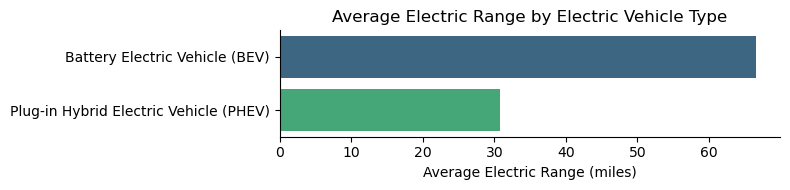

In [113]:


# Calculate the average Electric Range by Electric Vehicle Type
range_by_ev_type = df.groupby('Electric Vehicle Type', as_index=False)['Electric Range'].mean()

# Plot the comparison using Seaborn
plt.figure(figsize=(8, 2))
sns.barplot(data=range_by_ev_type, y='Electric Vehicle Type', x='Electric Range', palette='viridis')


plt.title('Average Electric Range by Electric Vehicle Type', fontsize=12)
plt.ylabel('')
plt.xlabel('Average Electric Range (miles)')
plt.xticks(rotation=0)

sns.despine()
plt.tight_layout()
plt.show()


-   **Key Insights:**

    -   BEVs have a significantly higher average electric range, approximately 65 miles, compared to PHEVs, which have an average range of around 30 miles. This highlights the difference in design and purpose between the two types of vehicles.

    -   BEVs are designed for longer trips solely on electric power, which is reflected in their higher average range. PHEVs, on the other hand, combine electric power with a conventional internal combustion engine, offering flexibility but with a shorter electric-only range.

____

-   Next, let's see the electric range and how it vary among the top Makes and Models

In [114]:
# Group the data by 'Make' and 'Model', then calculate the mean electric range for each group
df_make_model_top10 = df.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
df_make_model_top10.head(10)

,Make,Model,Electric Range
0,HYUNDAI,KONA,258.000000
1,TESLA,ROADSTER,234.673913
2,JAGUAR,I-PACE,203.741379
3,TESLA,MODEL S,176.794449
4,CHEVROLET,BOLT EV,154.857143
5,TESLA,MODEL X,137.192600
6,AUDI,E-TRON,130.626838
7,TESLA,MODEL 3,109.463028
8,VOLKSWAGEN,E-GOLF,107.529577
9,TOYOTA,RAV4,102.555556


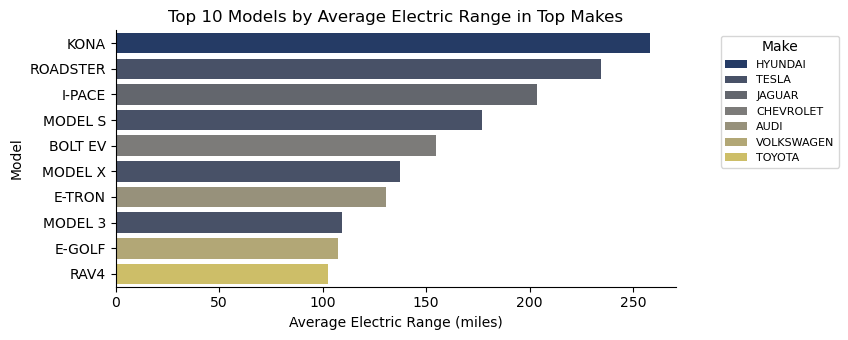

In [115]:

plt.figure(figsize=(9, 3.5))

# Plot the top 10 models by average electric range
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=df_make_model_top10.head(10), palette="cividis")

plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make',loc='upper right', bbox_to_anchor=(1.3, 1) ,fontsize=8)

sns.despine()
plt.tight_layout()
plt.show()

-   **Key Insights:**

    -   Highest Average Electric Range:

        -   The HYUNDAI KONA tops the chart with an average electric range exceeding 250 miles, making it the leader in this dataset.

    -   Dominance of Tesla:

        -   Tesla models dominate the top 10 list, with the ROADSTER, MODEL S, MODEL X, and MODEL 3 all featured prominently. This suggests Tesla's strong performance and consistency in producing EVs with high electric ranges.

    -   Diverse Manufacturers:

        -   In addition to Tesla, the chart includes models from a variety of manufacturers:

            -   JAGUAR I-PACE

            -   CHEVROLET BOLT EV

            -   AUDI E-TRON

            -   VOLKSWAGEN E-GOLF

            -   TOYOTA RAV4

        -   This diversity indicates that several manufacturers are successfully developing EVs with competitive electric ranges.

    -   Competitive Electric Ranges:

        -   All models in the top 10 list have substantial electric ranges, indicating significant advancements in battery technology and efficiency across the industry.

____

- **6 -** Market Growth Projections:

  -  How can we calculate the Compound Annual Growth Rate (CAGR) to forecast the total number of electric vehicles (EVs) expected to be registered in 2024 and estimate the market size for the next five years?

In [116]:
df_registered = df['Model Year'].value_counts().sort_index()

df_registered

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [117]:

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = df_registered[df_registered.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


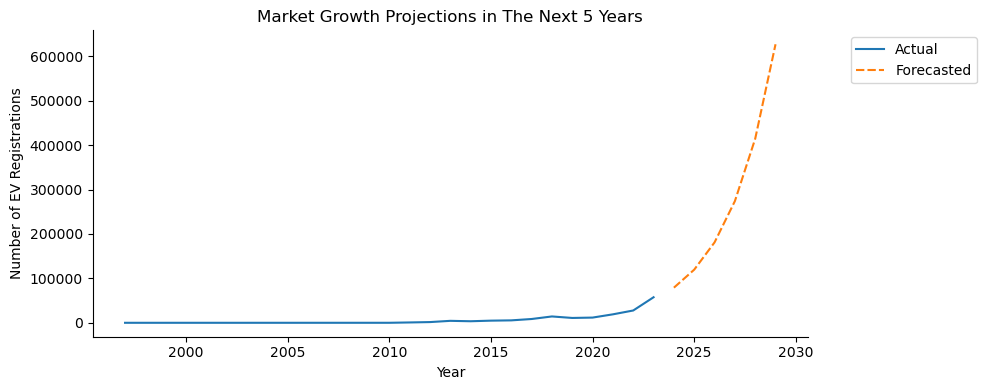

In [118]:

# Prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# Actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]


plotting_data = {
    'Year': list(actual_years) + list(forecast_years_full),
    'Registrations': list(actual_values) + forecasted_values_full,
    'Type': ['Actual'] * len(actual_years) + ['Forecasted'] * len(forecast_years_full)
}
df_plot = pd.DataFrame(plotting_data)

plt.figure(figsize=(10, 4))

# Plot using seaborn
sns.lineplot(data=df_plot, x='Year', y='Registrations', hue='Type', style='Type')

plt.title('Market Growth Projections in The Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


sns.despine()
plt.tight_layout()
plt.show()


-   **Key Insights:**
    -   Historical Growth:

        -   From 2021 to 2023, there has been a notable increase in the number of EV registrations. The figures rose from 19,063 in 2021 to 27,708 in 2022, and then significantly jumped to 57,519 in 2023. This upward trend indicates a growing adoption of electric vehicles over recent years.

    -   Forecasted Growth:

        -   The forecasted data shows an exponential increase in EV registrations from 2024 onwards. This sharp rise suggests a strong expected market growth, driven by factors such as technological advancements, government incentives, and increasing consumer demand for sustainable transportation options.

    -   Market Expansion:

        -   By 2029, the number of EV registrations is projected to reach over 600,000. This substantial growth highlights the potential for the EV market to become a significant segment of the automotive industry.

    -   Partial Data for 2024:

        -   The data for 2024, currently at 7,072 registrations, is incomplete as it only includes figures till March. However, using the growth rate from previous years, the total number of EVs expected to be registered in 2024 can be projected to provide a more accurate estimate.

------

### Summary of the Electric Vehicle Market Analysis in the United States
1. **Electric Range Distribution:**
    -   The majority of electric vehicles (EVs) have a range of 0-50 miles, with a high concentration around 0-25 miles. There is a significant decline in the number of EVs as the range exceeds 50 miles, indicating a focus on urban commuting and shorter distances.

    -   Minor peaks at 100, 150, 200, and 250 miles suggest that longer-range EVs exist but are less common.

2. **Historical and Future Trends in EV Range:**
    -   From 1997 to 2009, there was a steady increase in the average electric range, peaking around 225 miles in 2009.

    -   A sharp decline around 2010 indicates potential challenges during that period.

    -   The range steadily increased again from 2011 to 2020, peaking at about 250 miles in 2020.

    -   Post-2021, a decline is observed, with fluctuations indicating market adjustments and external factors.

3. **Average Electric Range by Vehicle Type:**
    -   Battery Electric Vehicles (BEVs) have a significantly higher average range (approximately 65 miles) compared to Plug-in Hybrid Electric Vehicles (PHEVs) (around 30 miles).

    -   This difference highlights the distinct design and purpose of BEVs for longer trips and PHEVs for flexibility and versatility.

4. **Top 10 Models by Average Electric Range:**
    -   HYUNDAI KONA leads with an average range exceeding 250 miles.

    -   Tesla models dominate the top 10 list, indicating strong performance in producing long-range EVs.

    -   Other notable models include JAGUAR I-PACE, CHEVROLET BOLT EV, AUDI E-TRON, VOLKSWAGEN E-GOLF, and TOYOTA RAV4.

5. **Market Size Forecast:**
    -   The number of EVs registered each year has seen a significant increase, with 19,063 registrations in 2021, 27,708 in 2022, and a jump to 57,519 in 2023.

    -   Using the Compound Annual Growth Rate (CAGR) from previous years, the forecasted data shows an exponential growth in EV registrations, projecting over 600,000 registrations by 2029.

6. **Current and Estimated EV Market:**
    -   The plot of current and estimated EV registrations indicates strong future market growth, driven by technological advancements, government incentives, and increasing consumer demand.

    -   The exponential increase in forecasted registrations highlights the potential for the EV market to become a significant segment of the automotive industry.

----------------------------------------------------------------

Please note that this analysis is based on the provided dataset, and additional data sources, such as industry reports, consumer feedback, and government statistics, may be required to provide a more accurate and comprehensive understanding of the electric vehicle market in the United States.

**Prepared by:**
-   Mohamed Fawzi   -   Data Nerd   -   modyreturn@gmail.com 

- github: https://github.com/modyreturn

- LinkedIn: https://www.linkedin.com/in/mofawzirj